# **1. Import Libraries**

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OneHotEncoder, KBinsDiscretizer, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV, RidgeClassifier, RidgeClassifierCV 
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, r2_score, confusion_matrix, classification_report
from sklearn.feature_selection import VarianceThreshold, SelectKBest, SelectFromModel, f_regression, mutual_info_regression, RFECV, RFE 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA

from xgboost import XGBClassifier, XGBRegressor
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


# **2. Explore Basic DataFrame**

## **2.1 Check df8**

In [3]:
# Import the basic DataFrame df8
df = pd.read_pickle('/Users/enhuali/Documents_Enhua/Data Science Notes/Python/df8.pkl')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
# Check shape
df.shape

(2135801, 96)

In [5]:
# Check columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2135801 entries, 127 to 2150338
Data columns (total 96 columns):
 #   Column                                     Dtype         
---  ------                                     -----         
 0   IncidentNumber                             object        
 1   DateOfCall                                 datetime64[ns]
 2   CalYear                                    int64         
 3   TimeOfCall                                 object        
 4   HourOfCall                                 int64         
 5   IncidentGroup                              object        
 6   StopCodeDescription                        object        
 7   SpecialServiceType                         object        
 8   PropertyCategory                           object        
 9   PropertyType                               object        
 10  AddressQualifier                           object        
 11  Postcode_full                              object        
 12  Pos

In [6]:
# Check if there is any duplicated rows

df.duplicated().sum()

0

In [7]:
# Change the proj_TravelTime columns to data type float64

proj_TraveTime = ['proj_TravelTimeSeconds_previous_1', 'proj_TravelTimeSeconds_previous_2', 'proj_TravelTimeSeconds_previous_3', 'proj_TravelTimeSeconds_previous_4',
                  'proj_TravelTimeSeconds_previous_5']

df[proj_TraveTime] = df[proj_TraveTime].astype('float64')

In [8]:
# Check columns again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2135801 entries, 127 to 2150338
Data columns (total 96 columns):
 #   Column                                     Dtype         
---  ------                                     -----         
 0   IncidentNumber                             object        
 1   DateOfCall                                 datetime64[ns]
 2   CalYear                                    int64         
 3   TimeOfCall                                 object        
 4   HourOfCall                                 int64         
 5   IncidentGroup                              object        
 6   StopCodeDescription                        object        
 7   SpecialServiceType                         object        
 8   PropertyCategory                           object        
 9   PropertyType                               object        
 10  AddressQualifier                           object        
 11  Postcode_full                              object        
 12  Pos

/Applications/anaconda3/envs/env_el/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/envs/env_el/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/envs/env_el/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/envs/env_el/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

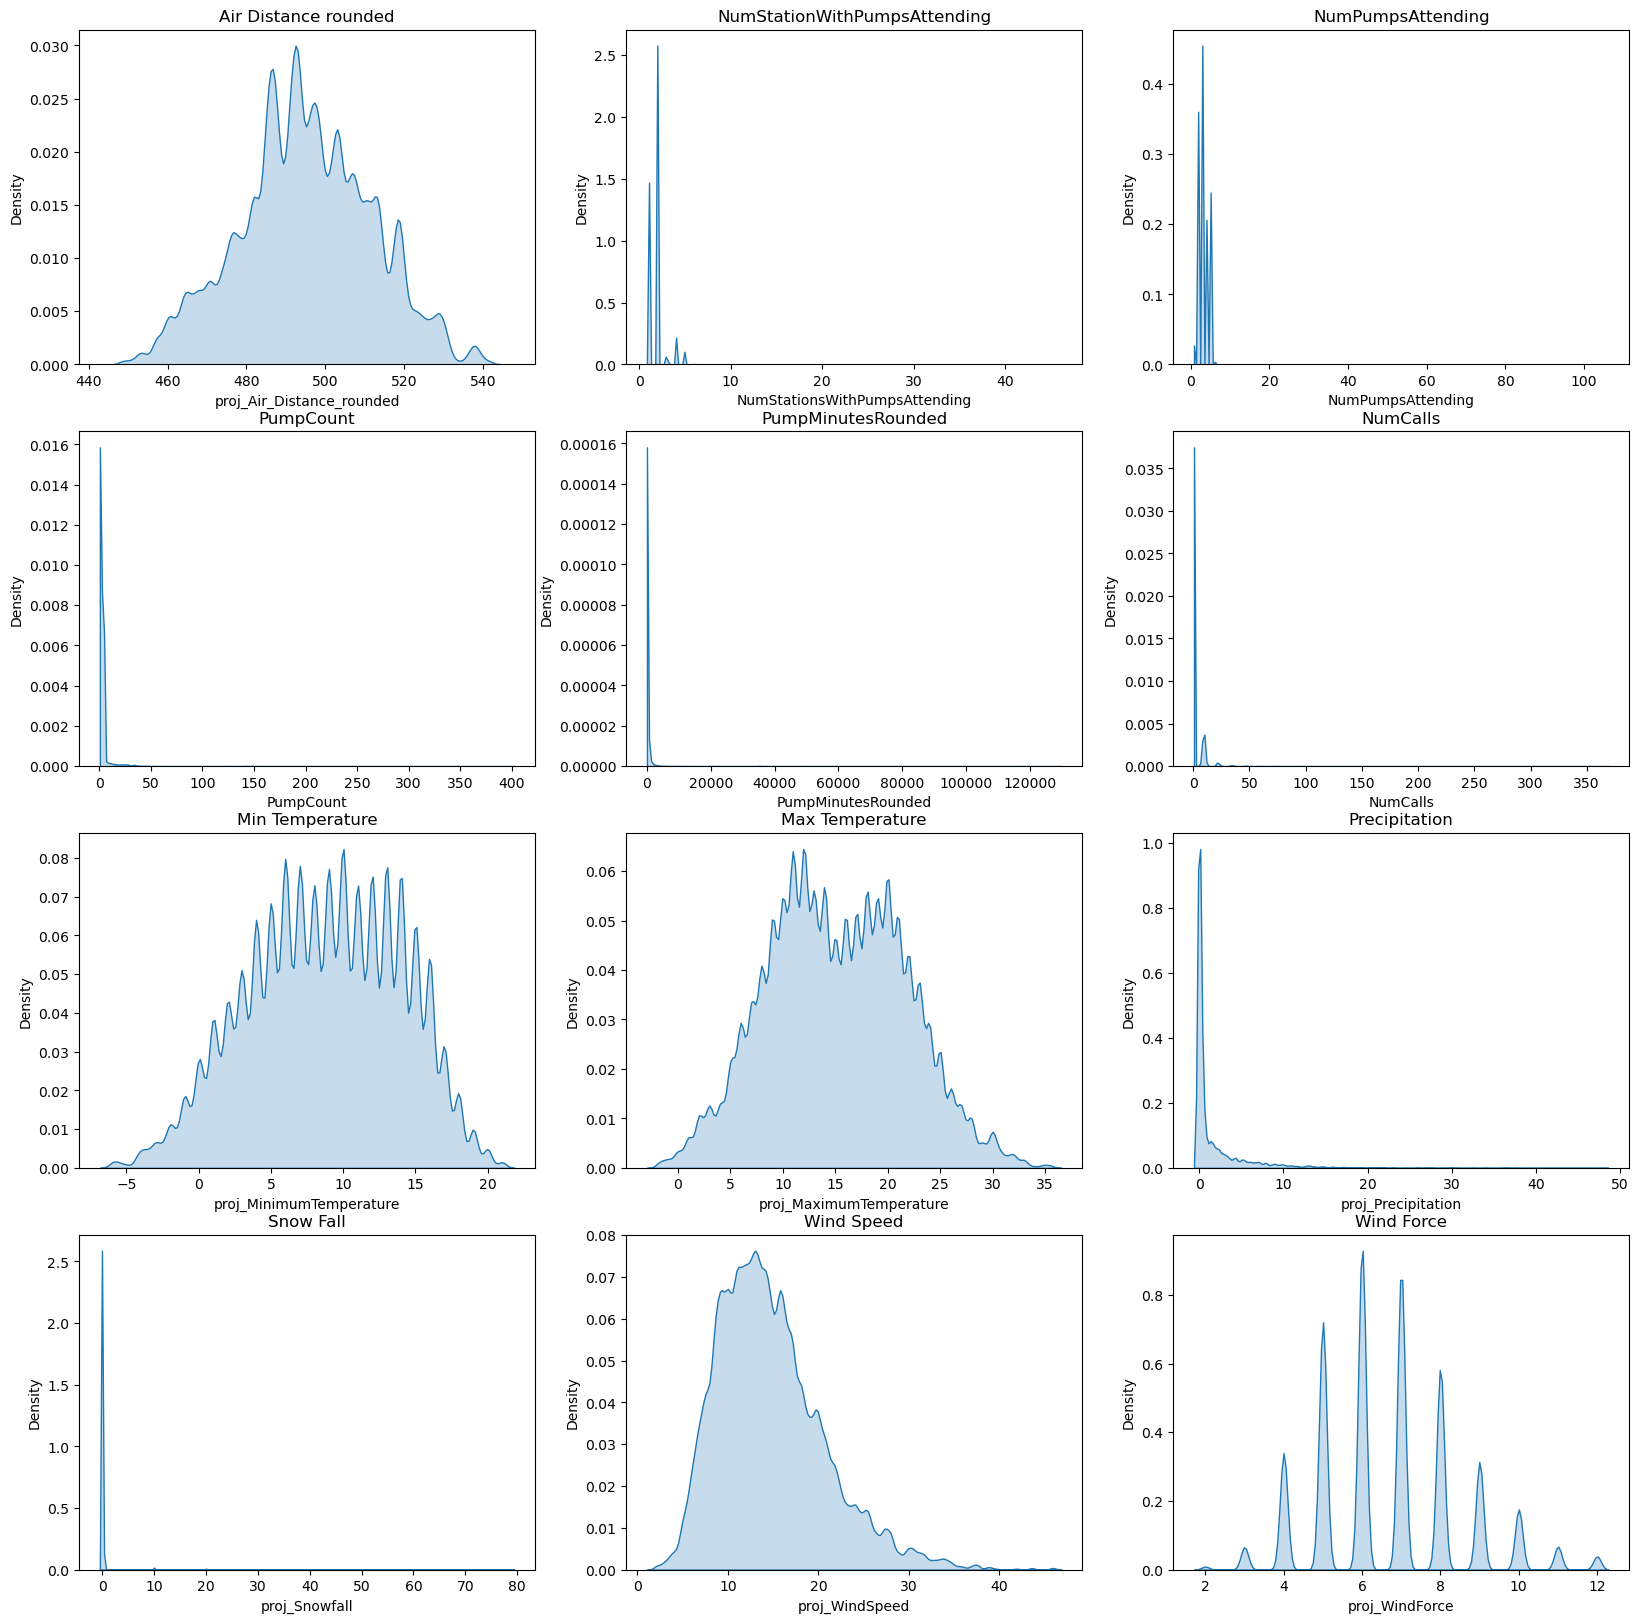

In [8]:
# Check the distribution of the key numeric values - part 1
fig, axs = plt.subplots(4, 3, figsize=(20, 20))

sns.kdeplot(df.proj_Air_Distance_rounded, fill=True, ax=axs[0,0])
axs[0,0].set_title('Air Distance rounded')

sns.kdeplot(df.NumStationsWithPumpsAttending, fill=True, ax=axs[0,1])
axs[0,1].set_title('NumStationWithPumpsAttending')

sns.kdeplot(df.NumPumpsAttending, fill=True, ax=axs[0,2])
axs[0,2].set_title('NumPumpsAttending')

sns.kdeplot(df.PumpCount, fill=True, ax=axs[1,0])
axs[1,0].set_title('PumpCount')

sns.kdeplot(df.PumpMinutesRounded, fill=True, ax=axs[1,1])
axs[1,1].set_title('PumpMinutesRounded')

sns.kdeplot(df.NumCalls, fill=True, ax=axs[1,2])
axs[1,2].set_title('NumCalls')

sns.kdeplot(df.proj_MinimumTemperature, fill=True, ax=axs[2,0])
axs[2,0].set_title('Min Temperature')

sns.kdeplot(df.proj_MaximumTemperature, fill=True, ax=axs[2,1])
axs[2,1].set_title('Max Temperature')

sns.kdeplot(df.proj_Precipitation, fill=True, ax=axs[2,2])
axs[2,2].set_title('Precipitation')

sns.kdeplot(df.proj_Snowfall, fill=True, ax=axs[3,0])
axs[3,0].set_title('Snow Fall')

sns.kdeplot(df.proj_WindSpeed, fill=True, ax=axs[3,1])
axs[3,1].set_title('Wind Speed')

sns.kdeplot(df.proj_WindForce, fill=True, ax=axs[3,2])
axs[3,2].set_title('Wind Force')


plt.show()

/Applications/anaconda3/envs/env_el/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/envs/env_el/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/envs/env_el/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/envs/env_el/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

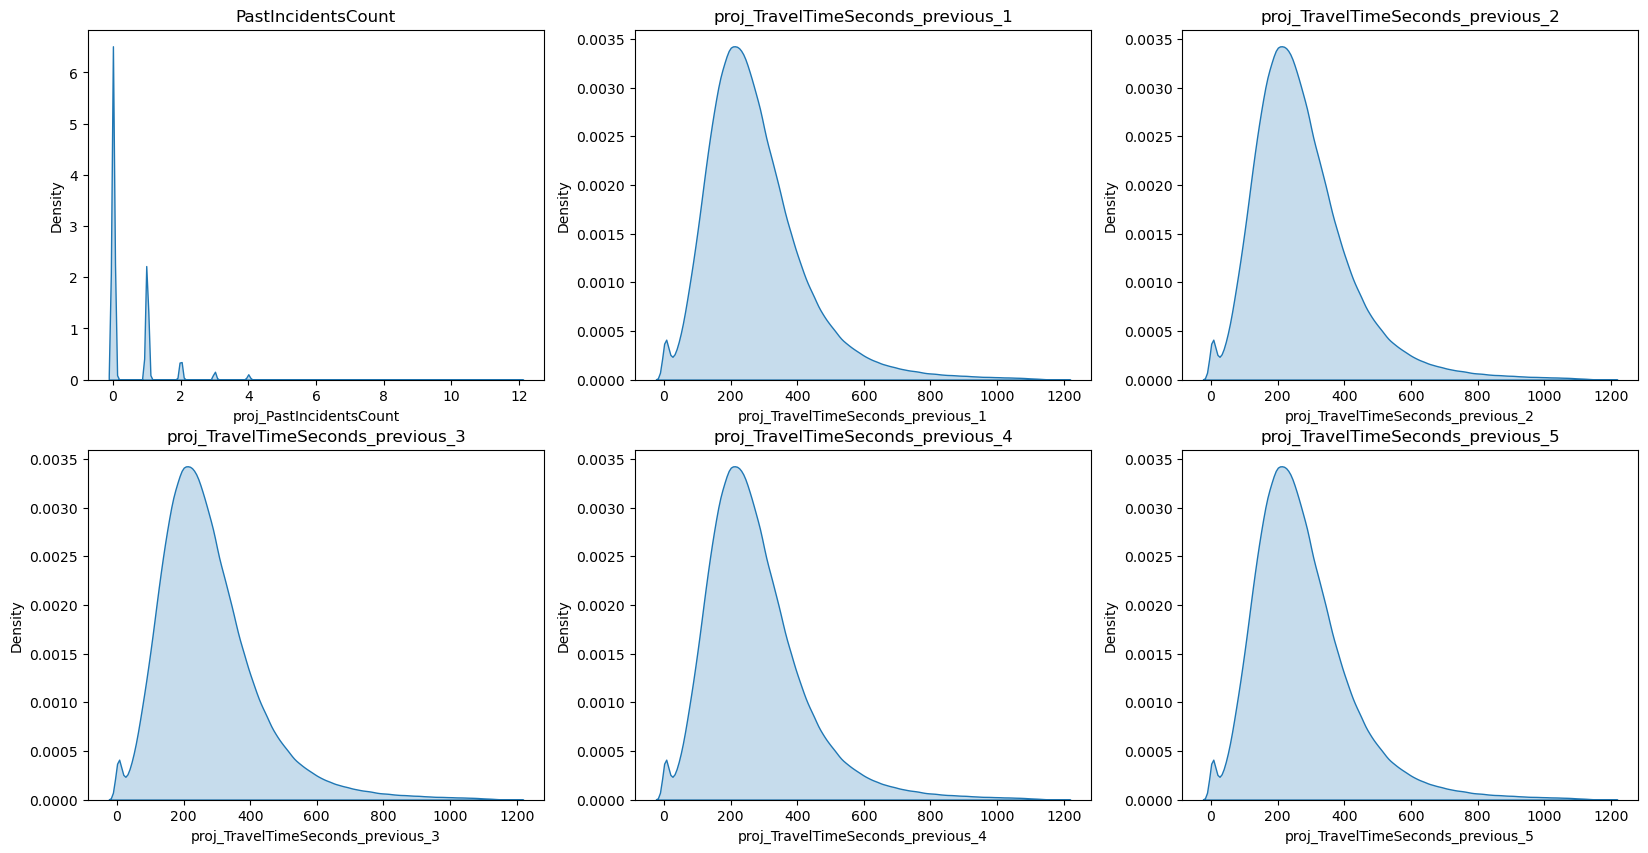

In [13]:
# Check the distribution of numeric values - part 2

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

sns.kdeplot(df.proj_PastIncidentsCount, fill=True, ax=axs[0,0])
axs[0,0].set_title('PastIncidentsCount')

sns.kdeplot(df.proj_TravelTimeSeconds_previous_1,fill=True, ax=axs[0,1])
axs[0,1].set_title('proj_TravelTimeSeconds_previous_1')

sns.kdeplot(df.proj_TravelTimeSeconds_previous_2,fill=True, ax=axs[0,2])
axs[0,2].set_title('proj_TravelTimeSeconds_previous_2')

sns.kdeplot(df.proj_TravelTimeSeconds_previous_3,fill=True, ax=axs[1,0])
axs[1,0].set_title('proj_TravelTimeSeconds_previous_3')

sns.kdeplot(df.proj_TravelTimeSeconds_previous_4,fill=True, ax=axs[1,1])
axs[1,1].set_title('proj_TravelTimeSeconds_previous_4')

sns.kdeplot(df.proj_TravelTimeSeconds_previous_5,fill=True, ax=axs[1,2])
axs[1,2].set_title('proj_TravelTimeSeconds_previous_5')

plt.show()

## **2.2 Columns to keep before feature selection**

In [9]:
# Excluding variables that obviously will not contribute to predicting target variable TravelTime or are duplicates of other columns
# Not using EstimatedDistanceKMs as the columns are calculated by using target variable TraveTimeSeconds and thus can't be used as explanatory variable to "predict" Travel Time again.

# Numeric variables that should be scaled using MinMaxScaler
num_var1 = ['NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount', 'NumCalls', 'proj_Snowfall', 'proj_WindForce', 'proj_PastIncidentsCount']

# Numeric variables that should be scaled using StandardScaler
num_var2 = ['proj_Air_Distance_rounded', 'proj_MinimumTemperature', 'proj_MaximumTemperature', 'proj_Precipitation', 'proj_WindSpeed', 'proj_TravelTimeSeconds_previous_1',
            'proj_TravelTimeSeconds_previous_2', 'proj_TravelTimeSeconds_previous_3', 'proj_TravelTimeSeconds_previous_4', 'proj_TravelTimeSeconds_previous_5']

# Categorical variables
cat_var = ['CalYear' ,'HourOfCall', 'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType', 'PropertyCategory', 'PropertyType', 'AddressQualifier', 
            'IncGeo_BoroughCode', 'DeployedFromStation_Name', 'DeployedFromLocation', 'PumpOrder', 'PlusCode_Description', 'proj_CalMonth', 
            'proj_CalWeekday', 'proj_CityCenter', 'proj_PeakHours', 'proj_WindDescription']


# Target variable TravelTimeSeconds

In [10]:
# Keep only the columns as defined above

df = df[num_var1 + num_var2 + cat_var + ['TravelTimeSeconds']]
df = pd.DataFrame(df)


In [11]:
# Check the columns of df

print(df.columns)

Index(['NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'NumCalls', 'proj_Snowfall', 'proj_WindForce',
       'proj_PastIncidentsCount', 'proj_Air_Distance_rounded',
       'proj_MinimumTemperature', 'proj_MaximumTemperature',
       'proj_Precipitation', 'proj_WindSpeed',
       'proj_TravelTimeSeconds_previous_1',
       'proj_TravelTimeSeconds_previous_2',
       'proj_TravelTimeSeconds_previous_3',
       'proj_TravelTimeSeconds_previous_4',
       'proj_TravelTimeSeconds_previous_5', 'CalYear', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier',
       'IncGeo_BoroughCode', 'DeployedFromStation_Name',
       'DeployedFromLocation', 'PumpOrder', 'PlusCode_Description',
       'proj_CalMonth', 'proj_CalWeekday', 'proj_CityCenter', 'proj_PeakHours',
       'proj_WindDescription', 'TravelTimeSeconds'],
      dtype='object')


In [12]:
# Change some of the column names (deleting the "-" in the name, so that it is more easy to get important feature list in next steps)

rename = {'proj_Snowfall': 'projSnowfall', 'proj_WindForce': 'projWindForce', 'proj_PastIncidentsCount': 'projPastIncidentsCount','proj_Air_Distance_rounded': 'projAirDistanceRounded', 
          'proj_MinimumTemperature': 'projMinTemp', 'proj_MaximumTemperature': 'projMaxTemp', 'proj_Precipitation': 'projPrecipitation', 'proj_WindSpeed': 'projWindSpeed', 
          'proj_TravelTimeSeconds_previous_1': 'projTravelTimesSecondsPrevious1', 'proj_TravelTimeSeconds_previous_2': 'projTravelTimesSecondsPrevious2',
          'proj_TravelTimeSeconds_previous_3': 'projTravelTimesSecondsPrevious3', 'proj_TravelTimeSeconds_previous_4': 'projTravelTimesSecondsPrevious4',
          'proj_TravelTimeSeconds_previous_5': 'projTravelTimesSecondsPrevious5',
          'IncGeo_BoroughCode': 'IncGeoBoroughCode', 'DeployedFromStation_Name': 'DeployedFromStationName',
          'PlusCode_Description': 'PlusCodeDescription', 'proj_CalMonth': 'projCalMonth', 'proj_CalWeekday': 'projCalWeekday', 'proj_CityCenter': 'projCityCenter', 'proj_PeakHours': 'projPeakHours',
          'proj_WindDescription': 'projWindDescription'}

In [13]:
# Renaming

df = df.rename(columns=rename)

In [14]:
# Check column headers

print(df.columns)

Index(['NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'NumCalls', 'projSnowfall', 'projWindForce', 'projPastIncidentsCount',
       'projAirDistanceRounded', 'projMinTemp', 'projMaxTemp',
       'projPrecipitation', 'projWindSpeed', 'projTravelTimesSecondsPrevious1',
       'projTravelTimesSecondsPrevious2', 'projTravelTimesSecondsPrevious3',
       'projTravelTimesSecondsPrevious4', 'projTravelTimesSecondsPrevious5',
       'CalYear', 'HourOfCall', 'IncidentGroup', 'StopCodeDescription',
       'SpecialServiceType', 'PropertyCategory', 'PropertyType',
       'AddressQualifier', 'IncGeoBoroughCode', 'DeployedFromStationName',
       'DeployedFromLocation', 'PumpOrder', 'PlusCodeDescription',
       'projCalMonth', 'projCalWeekday', 'projCityCenter', 'projPeakHours',
       'projWindDescription', 'TravelTimeSeconds'],
      dtype='object')


In [15]:
# Check shape
df.shape

(2135801, 36)

In [16]:
# Check missing values

df_missing = df.isnull().sum() / len(df) * 100

print(df_missing[df_missing > 0])

projWindForce                       0.047242
projMinTemp                         0.018775
projMaxTemp                         0.029825
projWindSpeed                       0.047242
projTravelTimesSecondsPrevious1     0.006649
projTravelTimesSecondsPrevious2     0.013297
projTravelTimesSecondsPrevious3     0.019946
projTravelTimesSecondsPrevious4     0.026594
projTravelTimesSecondsPrevious5     0.033243
SpecialServiceType                 78.612052
projWindDescription                 0.047242
dtype: float64


In [17]:
# Except SpecialServiceType, we drop the rows containing missing values
# First, fill in missing values for SpecialServiceType with value 'unknow'

df['SpecialServiceType'] = df['SpecialServiceType'].fillna('Unknown')


In [18]:
# check
df_missing = df.isnull().sum() / len(df) * 100

print(df_missing[df_missing > 0])

projWindForce                      0.047242
projMinTemp                        0.018775
projMaxTemp                        0.029825
projWindSpeed                      0.047242
projTravelTimesSecondsPrevious1    0.006649
projTravelTimesSecondsPrevious2    0.013297
projTravelTimesSecondsPrevious3    0.019946
projTravelTimesSecondsPrevious4    0.026594
projTravelTimesSecondsPrevious5    0.033243
projWindDescription                0.047242
dtype: float64


In [19]:
# Drop missing values

df = df.dropna()

In [20]:
# Check missing values again
df_missing = df.isnull().sum() / len(df) * 100

print(df_missing[df_missing > 0])

Series([], dtype: float64)


In [21]:
# Check duplicates

df.duplicated().sum()

0

In [22]:
# Check shape
df.shape

(2134082, 36)

## **2.4 Create binned Target variable**

In [23]:
# Check the statistics of TravelTimeSeconds

df.TravelTimeSeconds.describe()

count    2.134082e+06
mean     2.762390e+02
std      1.503876e+02
min      0.000000e+00
25%      1.760000e+02
50%      2.500000e+02
75%      3.450000e+02
max      1.195000e+03
Name: TravelTimeSeconds, dtype: float64

In [24]:
# Create discrete Target variable

k_bins = 8
discretizer = KBinsDiscretizer(n_bins=k_bins, encode='ordinal', strategy='quantile')
df['TravelTimeClass'] = discretizer.fit_transform(df[['TravelTimeSeconds']])

# Convert numeric bins to labels
df['TravelTimeClass'] = df['TravelTimeClass'].apply(lambda x: f'Bin{x+1}')

# Summary of bin counts
bin_counts = df.TravelTimeClass.value_counts()
print(bin_counts)

TravelTimeClass
Bin3.0    271814
Bin6.0    270637
Bin5.0    270149
Bin7.0    269476
Bin8.0    266237
Bin1.0    263975
Bin2.0    262049
Bin4.0    259745
Name: count, dtype: int64


In [25]:
# Display bin edges

bin_edges = discretizer.bin_edges_[0]
for i in range(len(bin_edges) - 1):
    print(f"Bin {i+1}: {bin_edges[i]} seconds to {bin_edges[i+1]} seconds")

Bin 1: 0.0 seconds to 131.0 seconds
Bin 2: 131.0 seconds to 175.0 seconds
Bin 3: 175.0 seconds to 213.0 seconds
Bin 4: 213.0 seconds to 249.0 seconds
Bin 5: 249.0 seconds to 291.0 seconds
Bin 6: 291.0 seconds to 345.0 seconds
Bin 7: 345.0 seconds to 433.0 seconds
Bin 8: 433.0 seconds to 1192.0 seconds


In [26]:
# Check

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2134082 entries, 127 to 2150333
Data columns (total 37 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   NumStationsWithPumpsAttending    float64
 1   NumPumpsAttending                float64
 2   PumpCount                        int64  
 3   NumCalls                         float64
 4   projSnowfall                     float64
 5   projWindForce                    float64
 6   projPastIncidentsCount           int64  
 7   projAirDistanceRounded           float64
 8   projMinTemp                      float64
 9   projMaxTemp                      float64
 10  projPrecipitation                float64
 11  projWindSpeed                    float64
 12  projTravelTimesSecondsPrevious1  float64
 13  projTravelTimesSecondsPrevious2  float64
 14  projTravelTimesSecondsPrevious3  float64
 15  projTravelTimesSecondsPrevious4  float64
 16  projTravelTimesSecondsPrevious5  float64
 17  CalYear    

# **3. Take 1 Year Data**

## **3.1. Take CalYear 2023**

In [27]:
# Take only CalYear 2023

df_1 = df[df.CalYear == 2023]
df_1 = pd.DataFrame(df_1)

In [28]:
# Check the CalYear in df_1
df_1.CalYear.unique()

array([2023])

In [29]:

 # Drop column CalYear
df_1 = df_1.drop('CalYear', axis=1)

In [30]:
# Check duplicates
df_1.duplicated().sum()

0

## **3.2. Discrete Target Variable**

### **3.2.1. Pre-Processing data**

In [31]:
# Create datasets for features and target

X = df_1.drop(['TravelTimeSeconds', 'TravelTimeClass'], axis=1)
y = df_1.TravelTimeClass

In [32]:
# Numeric variables that should be scaled using MinMaxScaler
num_var1 = ['NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount', 'NumCalls', 'projSnowfall', 'projWindForce', 'projPastIncidentsCount']

# Numeric variables that should be scaled using StandardScaler
num_var2 = ['projAirDistanceRounded', 'projMinTemp', 'projMaxTemp', 'projPrecipitation', 'projWindSpeed', 'projTravelTimesSecondsPrevious1',
       'projTravelTimesSecondsPrevious2', 'projTravelTimesSecondsPrevious3',
       'projTravelTimesSecondsPrevious4', 'projTravelTimesSecondsPrevious5']

# Categorical variables

cat_var = ['HourOfCall', 'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType', 'PropertyCategory', 'PropertyType', 'AddressQualifier', 
            'IncGeoBoroughCode', 'DeployedFromStationName', 'DeployedFromLocation', 'PumpOrder', 'PlusCodeDescription', 'projCalMonth', 
            'projCalWeekday', 'projCityCenter', 'projPeakHours', 'projWindDescription']

In [33]:
# Define the preprocessor pipeline

preprocessor = ColumnTransformer(transformers=[('num1', MinMaxScaler(), num_var1), ('num2', StandardScaler(), num_var2), ('cat', OneHotEncoder(handle_unknown='ignore'), cat_var)])

In [34]:
# Split the train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [35]:
# Transform the train and test datasets

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [36]:
# Check the shape of transformed train and test datasets

print(X_train_transformed.shape, X_test_transformed.shape)

(147512, 545) (36879, 545)


In [37]:
# Transform the train and test datasets into DataFrames with feature labels

one_hot_encoder = preprocessor.named_transformers_['cat']
one_hot_feature_names_transformed = one_hot_encoder.get_feature_names_out(cat_var).tolist()
numeric_feature_names = num_var1 + num_var2

all_feature_names = numeric_feature_names + one_hot_feature_names_transformed

X_train_transformed_df = pd.DataFrame.sparse.from_spmatrix(X_train_transformed, columns=all_feature_names)
X_test_transformed_df = pd.DataFrame.sparse.from_spmatrix(X_test_transformed, columns=all_feature_names)

In [38]:
# Check shape
print(X_train_transformed_df.shape, X_test_transformed_df.shape)

(147512, 545) (36879, 545)


### **3.2.2 RidgeClassifierCV**

#### **3.2.2.1. Train the model and assess model performance**

In [100]:
# Train the model

rdc_cv = RidgeClassifierCV()

rdc_cv.fit(X_train_transformed_df, y_train)

RidgeClassifierCV()

In [101]:
# Get the best alpha

rdc_cv.alpha_

10.0

In [102]:
# Make predictions
y_pred_train_rdccv = rdc_cv.predict(X_train_transformed_df)
y_pred_test_rdccv = rdc_cv.predict(X_test_transformed_df)

In [103]:
# Assess the performance

class_report_train_rdccv = classification_report(y_train, y_pred_train_rdccv)
class_report_test_rdccv = classification_report(y_test, y_pred_test_rdccv)

print('Classification report on train data: \n', class_report_train_rdccv)
print()
print('Classification report on test data: \n', class_report_test_rdccv)

Classification report on train data: 
               precision    recall  f1-score   support

      Bin1.0       0.25      0.43      0.31     16533
      Bin2.0       0.21      0.15      0.18     16014
      Bin3.0       0.21      0.23      0.22     17457
      Bin4.0       0.20      0.07      0.11     17494
      Bin5.0       0.19      0.09      0.12     18819
      Bin6.0       0.20      0.10      0.13     19619
      Bin7.0       0.22      0.22      0.22     21129
      Bin8.0       0.31      0.64      0.42     20447

    accuracy                           0.24    147512
   macro avg       0.22      0.24      0.21    147512
weighted avg       0.22      0.24      0.22    147512


Classification report on test data: 
               precision    recall  f1-score   support

      Bin1.0       0.24      0.41      0.30      4075
      Bin2.0       0.19      0.13      0.16      4012
      Bin3.0       0.19      0.21      0.20      4375
      Bin4.0       0.15      0.05      0.08      4362


#### **3.2.2.2. Feature Importance by SHAP Analysis**

In [146]:
# SHAP Analysis, instantiate the Explainer

explainer = shap.Explainer(rdc_cv, X_train_transformed_df)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


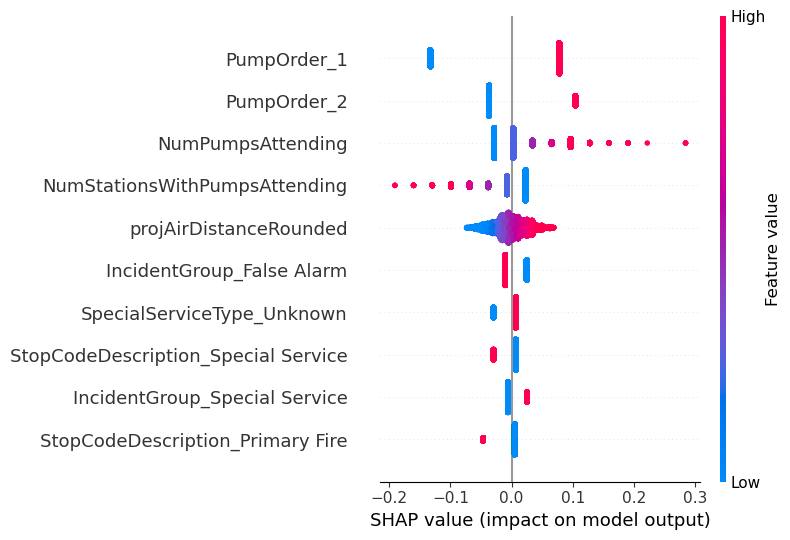

In [256]:
# Check the feature (encoded) importance for a certain target class, example for class 3

shap_values_class = explainer(X_test_transformed_df)

shap.summary_plot(shap_values_class[:,:,3], X_test_transformed_df, max_display=10)


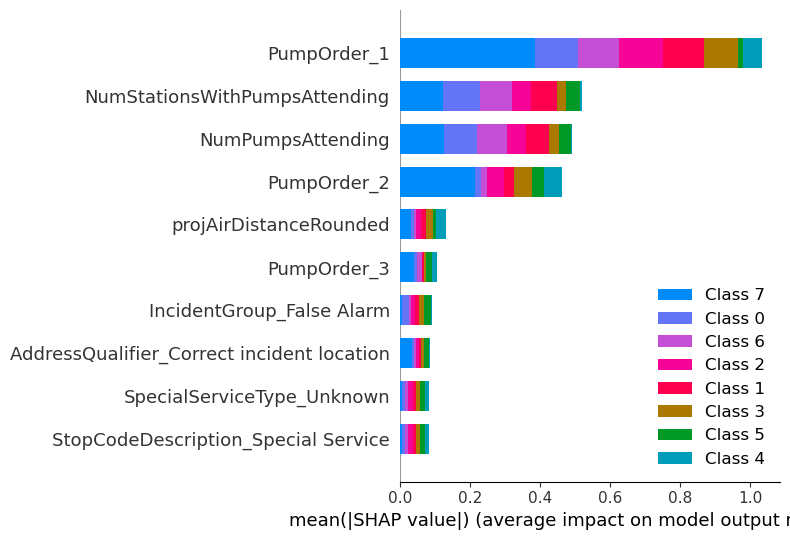

In [254]:
# check the average impact (absolute mean shap values) of features across target classes -- encoded features

shap_values = explainer.shap_values(X_test_transformed_df)

shap.summary_plot(shap_values, X_test_transformed_df, max_display=10, color_bar=True)

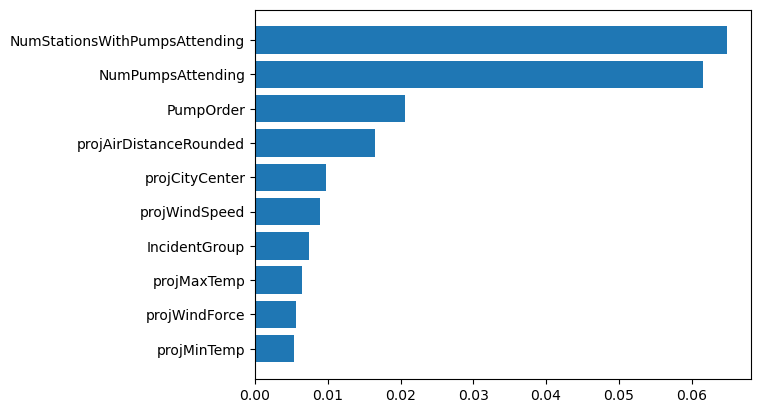

In [252]:
# check the average impact (absolute mean shap values) of features across target classes -- original features (before encoding)
# for original categorical features, we use the mean shap value of the underlying encoded features to avoid giving too much weights to categorical features which have a lot of categories


shap_values_df = pd.DataFrame(np.mean(np.abs(shap_values), axis=0), columns=all_feature_names)

feature_importance_shap = np.mean(shap_values_df, axis=0)

feature_importance_shap_df = pd.DataFrame({'feature': feature_importance_shap.index, 'importance': feature_importance_shap.values})


normalized_importance_shap = []

for cat_feature in cat_var:
    mask = feature_importance_shap_df['feature'].str.startswith(cat_feature + '_')
    mean_abs_importance = np.mean(feature_importance_shap_df.loc[mask, 'importance'])
    normalized_importance_shap.append({'feature': cat_feature, 'importance': mean_abs_importance})

for num_feature in numeric_feature_names:
    importance = feature_importance_shap_df[feature_importance_shap_df['feature'] == num_feature]['importance'].values[0]
    normalized_importance_shap.append({'feature': num_feature, 'importance': importance})

importance_df_shap = pd.DataFrame(normalized_importance_shap)
importance_df_shap = importance_df_shap.sort_values(by='importance', ascending=False)

importance_df_shap.head(10)

plt.barh(importance_df_shap.head(10)[::-1].feature, importance_df_shap.head(10)[::-1].importance)
plt.show()

## **3.3. Continous Target Variable**

### **3.3.1 Data Pre-Processing**

In [257]:
# Create datasets for features and target

X2 = df_1.drop(['TravelTimeSeconds', 'TravelTimeClass'], axis=1)
y2 = df_1.TravelTimeSeconds

In [258]:
# Split the train and test datasets

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

In [259]:
# Fit and transform the train and test datasets

X2_train_transformed = preprocessor.fit_transform(X2_train)
X2_test_transformed = preprocessor.transform(X2_test)

In [260]:
# Transform the train and test datasets into DataFrames with feature labels

one_hot_encoder = preprocessor.named_transformers_['cat']
one_hot_feature_names_transformed = one_hot_encoder.get_feature_names_out(cat_var).tolist()
numeric_feature_names = num_var1 + num_var2

all_feature_names = numeric_feature_names + one_hot_feature_names_transformed

X2_train_transformed_df = pd.DataFrame.sparse.from_spmatrix(X2_train_transformed, columns=all_feature_names)
X2_test_transformed_df = pd.DataFrame.sparse.from_spmatrix(X2_test_transformed, columns=all_feature_names)

In [261]:
# Check shape
print(X2_train_transformed_df.shape, X2_test_transformed_df.shape)

(147512, 545) (36879, 545)


### **3.3.2. RidgeCV**

#### **3.3.2.1 Train and assess the model performance**

In [263]:
# Train the model

rdg_cv = RidgeCV()

rdg_cv.fit(X2_train_transformed_df, y2_train)

RidgeCV()

In [264]:
# Get the best alpha

rdg_cv.alpha_

10.0

In [265]:
# Make predictions

y2_pred_train_rdgcv = rdg_cv.predict(X2_train_transformed_df)
y2_pred_test_rdgcv = rdg_cv.predict(X2_test_transformed_df)

In [266]:
# Assess the model performance

print('Score on train data:', rdg_cv.score(X2_train_transformed_df, y2_train))
print('Score on test data:', rdg_cv.score(X2_test_transformed_df, y2_test))
print()
print('mse on train data: ', mean_squared_error(y2_pred_train_rdgcv, y2_train))
print('mse on test data: ', mean_squared_error(y2_pred_test_rdgcv, y2_test))

Score on train data: 0.28495660611553175
Score on test data: 0.27707858174557587

mse on train data:  15954.977066491452
mse on test data:  16215.411989563316


#### **3.3.2.2. Feature Importance by SHAP analysis**

In [273]:
# SHAP Analysis, instantiate the Explainer

explainer = shap.Explainer(rdg_cv, X2_train_transformed_df)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


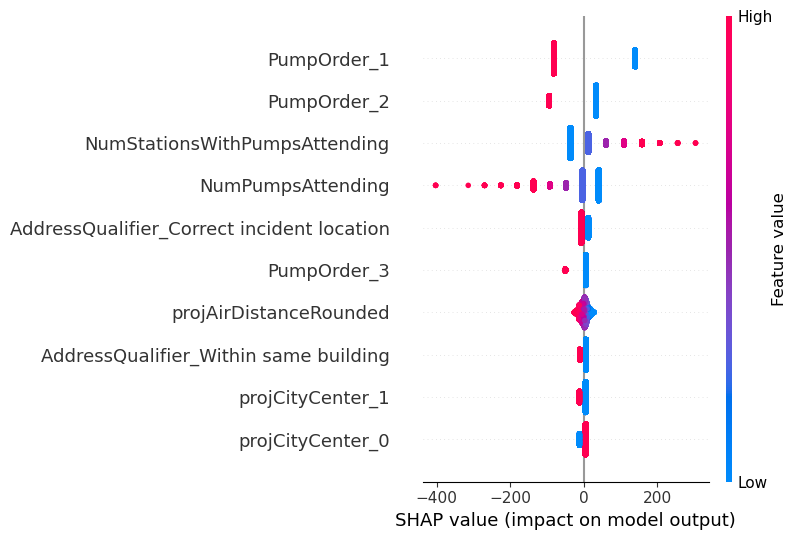

In [275]:
# check the average impact (absolute mean shap values) of features across target classes -- encoded features

shap_values = explainer.shap_values(X2_test_transformed_df)

shap.summary_plot(shap_values, X2_test_transformed_df, max_display=10, color_bar=True)

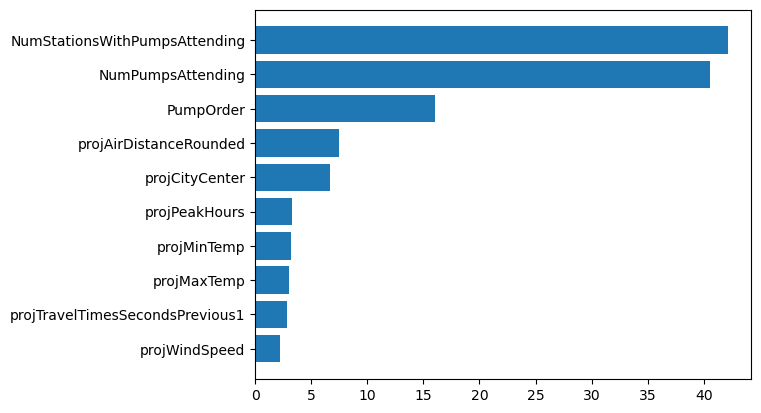

In [279]:
# check the average impact (absolute mean shap values) of features across target classes -- original features (before encoding)
# for original categorical features, we use the mean shap value of the underlying encoded features to avoid giving too much weights to categorical features which have a lot of categories


shap_values_df = pd.DataFrame(np.abs(shap_values), columns=all_feature_names)

feature_importance_shap = np.mean(shap_values_df, axis=0)

feature_importance_shap_df = pd.DataFrame({'feature': feature_importance_shap.index, 'importance': feature_importance_shap.values})


normalized_importance_shap = []

for cat_feature in cat_var:
    mask = feature_importance_shap_df['feature'].str.startswith(cat_feature + '_')
    mean_abs_importance = np.mean(feature_importance_shap_df.loc[mask, 'importance'])
    normalized_importance_shap.append({'feature': cat_feature, 'importance': mean_abs_importance})

for num_feature in numeric_feature_names:
    importance = feature_importance_shap_df[feature_importance_shap_df['feature'] == num_feature]['importance'].values[0]
    normalized_importance_shap.append({'feature': num_feature, 'importance': importance})

importance_df_shap = pd.DataFrame(normalized_importance_shap)
importance_df_shap = importance_df_shap.sort_values(by='importance', ascending=False)

importance_df_shap.head(10)

plt.barh(importance_df_shap.head(10)[::-1].feature, importance_df_shap.head(10)[::-1].importance)
plt.show()

# **4. Take 5 Year Data**

## **4.1. Take CalYear 2019 - 2024**

In [281]:
# Take CalYear 2019 to 2024

df_5 = df[df.CalYear.isin([2019, 2020, 2021, 2022, 2023, 2024])]
df_5 = pd.DataFrame(df_5)

In [282]:
# Check the CalYear in df_5
df_5.CalYear.unique()

array([2024, 2023, 2022, 2021, 2020, 2019])

In [284]:
# Drop the Column CalYear

df_5 = df_5.drop('CalYear', axis=1)

In [285]:
# Check duplicates

df_5.duplicated().sum()

0

## **4.2 Discrete Target Variable**

### **4.2.1. Pro-processing the data**

In [286]:
# Create datasets for features and target

X = df_5.drop(['TravelTimeSeconds', 'TravelTimeClass'], axis=1)
y = df_5.TravelTimeClass

In [287]:
# Numeric variables that should be scaled using MinMaxScaler
num_var1 = ['NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount', 'NumCalls', 'projSnowfall', 'projWindForce', 'projPastIncidentsCount']

# Numeric variables that should be scaled using StandardScaler
num_var2 = ['projAirDistanceRounded', 'projMinTemp', 'projMaxTemp', 'projPrecipitation', 'projWindSpeed', 'projTravelTimesSecondsPrevious1',
       'projTravelTimesSecondsPrevious2', 'projTravelTimesSecondsPrevious3',
       'projTravelTimesSecondsPrevious4', 'projTravelTimesSecondsPrevious5']

# Categorical variables

cat_var = ['HourOfCall', 'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType', 'PropertyCategory', 'PropertyType', 'AddressQualifier', 
            'IncGeoBoroughCode', 'DeployedFromStationName', 'DeployedFromLocation', 'PumpOrder', 'PlusCodeDescription', 'projCalMonth', 
            'projCalWeekday', 'projCityCenter', 'projPeakHours', 'projWindDescription']

In [288]:
# Define the preprocessor pipeline

preprocessor = ColumnTransformer(transformers=[('num1', MinMaxScaler(), num_var1), ('num2', StandardScaler(), num_var2), ('cat', OneHotEncoder(handle_unknown='ignore'), cat_var)])

In [289]:
# Split the train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [290]:
# Transform the train and test datasets

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [292]:
# Check the shape

print(X_train_transformed.shape, X_test_transformed.shape)

(695400, 561) (173851, 561)


In [293]:
# Transform the train and test datasets into DataFrames with feature labels

one_hot_encoder = preprocessor.named_transformers_['cat']
one_hot_feature_names_transformed = one_hot_encoder.get_feature_names_out(cat_var).tolist()
numeric_feature_names = num_var1 + num_var2

all_feature_names = numeric_feature_names + one_hot_feature_names_transformed

X_train_transformed_df = pd.DataFrame.sparse.from_spmatrix(X_train_transformed, columns=all_feature_names)
X_test_transformed_df = pd.DataFrame.sparse.from_spmatrix(X_test_transformed, columns=all_feature_names)

In [294]:
# Check the shapes

print(X_train_transformed_df.shape, X_test_transformed_df.shape)

(695400, 561) (173851, 561)


### **4.2.2 RidgeClassifierCV**

#### **4.2.2.1. Train the model and assess model peformance**

In [295]:
# Train the model

rdc_cv = RidgeClassifierCV()

rdc_cv.fit(X_train_transformed_df, y_train)

RidgeClassifierCV()

In [296]:
# Get the best alpha

rdc_cv.alpha_

10.0

In [297]:
# Make predictions

y_pred_train_rdccv = rdc_cv.predict(X_train_transformed_df)
y_pred_test_rdccv = rdc_cv.predict(X_test_transformed_df)

In [298]:
# Assess the performance

class_report_train_rdccv = classification_report(y_train, y_pred_train_rdccv)
class_report_test_rdccv = classification_report(y_test, y_pred_test_rdccv)

print('Classification report on train data: \n', class_report_train_rdccv)
print()
print('Classification report on test data: \n', class_report_test_rdccv)

Classification report on train data: 
               precision    recall  f1-score   support

      Bin1.0       0.25      0.43      0.31     16533
      Bin2.0       0.21      0.15      0.18     16014
      Bin3.0       0.21      0.23      0.22     17457
      Bin4.0       0.20      0.07      0.11     17494
      Bin5.0       0.19      0.09      0.12     18819
      Bin6.0       0.20      0.10      0.13     19619
      Bin7.0       0.22      0.22      0.22     21129
      Bin8.0       0.31      0.64      0.42     20447

    accuracy                           0.24    147512
   macro avg       0.22      0.24      0.21    147512
weighted avg       0.22      0.24      0.22    147512


Classification report on test data: 
               precision    recall  f1-score   support

      Bin1.0       0.23      0.44      0.31     20048
      Bin2.0       0.21      0.19      0.20     20032
      Bin3.0       0.19      0.20      0.19     21715
      Bin4.0       0.17      0.04      0.06     21292


#### **4.2.2.2 Feature Importance by SHAP Analysis**

In [303]:
# SHAP Analysis, instantiate the Explainer

explainer = shap.Explainer(rdc_cv, X_train_transformed_df)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


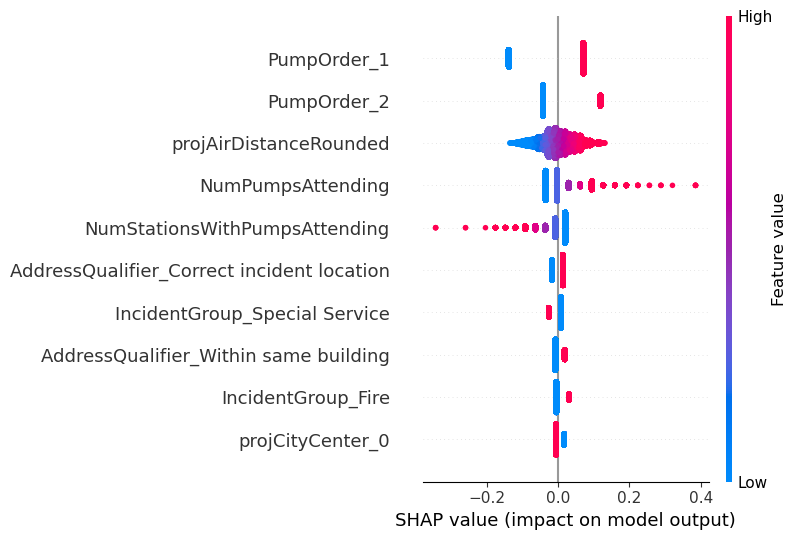

In [305]:
# Check the feature (encoded) importance for a certain target class, example for class 3

shap_values_class = explainer(X_test_transformed_df)

shap.summary_plot(shap_values_class[:,:,3], X_test_transformed_df, max_display=10)

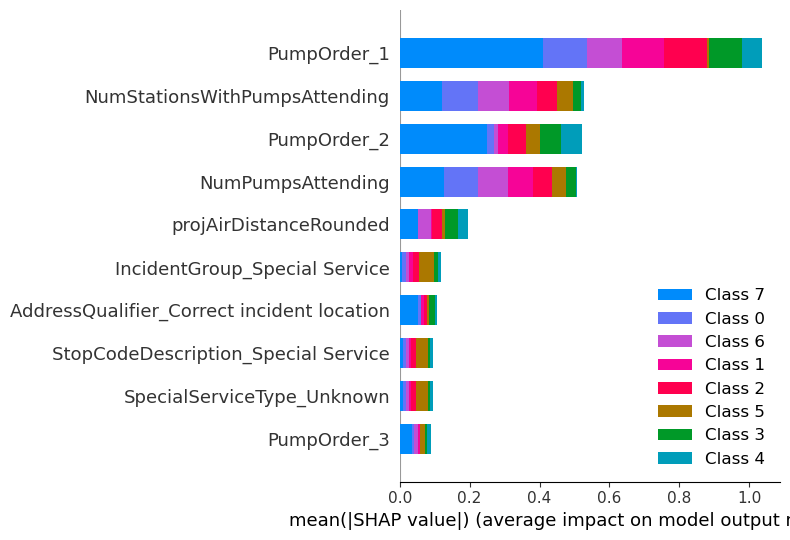

In [306]:
# check the average impact (absolute mean shap values) of features across target classes -- encoded features

shap_values = explainer.shap_values(X_test_transformed_df)

shap.summary_plot(shap_values, X_test_transformed_df, max_display=10, color_bar=True)

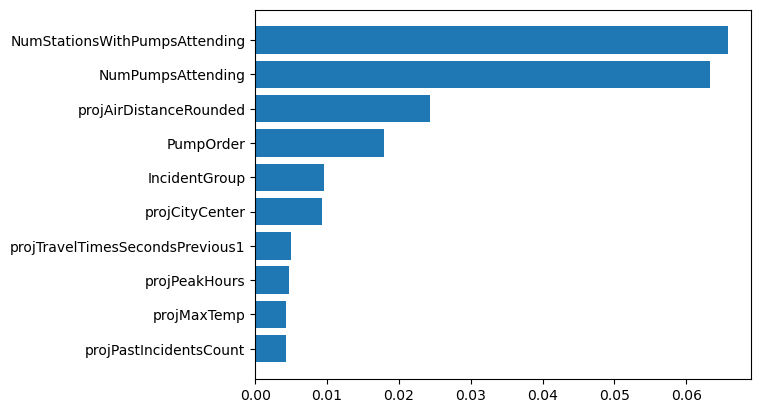

In [307]:
# check the average impact (absolute mean shap values) of features across target classes -- original features (before encoding)
# for original categorical features, we use the mean shap value of the underlying encoded features to avoid giving too much weights to categorical features which have a lot of categories


shap_values_df = pd.DataFrame(np.mean(np.abs(shap_values), axis=0), columns=all_feature_names)

feature_importance_shap = np.mean(shap_values_df, axis=0)

feature_importance_shap_df = pd.DataFrame({'feature': feature_importance_shap.index, 'importance': feature_importance_shap.values})


normalized_importance_shap = []

for cat_feature in cat_var:
    mask = feature_importance_shap_df['feature'].str.startswith(cat_feature + '_')
    mean_abs_importance = np.mean(feature_importance_shap_df.loc[mask, 'importance'])
    normalized_importance_shap.append({'feature': cat_feature, 'importance': mean_abs_importance})

for num_feature in numeric_feature_names:
    importance = feature_importance_shap_df[feature_importance_shap_df['feature'] == num_feature]['importance'].values[0]
    normalized_importance_shap.append({'feature': num_feature, 'importance': importance})

importance_df_shap = pd.DataFrame(normalized_importance_shap)
importance_df_shap = importance_df_shap.sort_values(by='importance', ascending=False)

importance_df_shap.head(10)

plt.barh(importance_df_shap.head(10)[::-1].feature, importance_df_shap.head(10)[::-1].importance)
plt.show()

## **4.3. Continuous Target Variable**

#### **4.3.1. Data Pre-processing**

In [315]:
# Create datasets for features and target

X2 = df_5.drop(['TravelTimeSeconds', 'TravelTimeClass'], axis=1)
y2 = df_5.TravelTimeSeconds

In [316]:
# Spilt the train and test datasets

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

In [317]:
# Fit and transform the train and test datasets

X2_train_transformed = preprocessor.fit_transform(X2_train)
X2_test_transformed = preprocessor.transform(X2_test)

In [318]:
# Transform the train and test datasets into DataFrames with feature labels

one_hot_encoder = preprocessor.named_transformers_['cat']
one_hot_feature_names_transformed = one_hot_encoder.get_feature_names_out(cat_var).tolist()
numeric_feature_names = num_var1 + num_var2

all_feature_names = numeric_feature_names + one_hot_feature_names_transformed

X2_train_transformed_df = pd.DataFrame.sparse.from_spmatrix(X2_train_transformed, columns=all_feature_names)
X2_test_transformed_df = pd.DataFrame.sparse.from_spmatrix(X2_test_transformed, columns=all_feature_names)

In [319]:
# Check shape

print(X2_train_transformed_df.shape, X2_test_transformed_df.shape)

(695400, 561) (173851, 561)


### **4.3.2. RidgeCV**

#### **4.3.2.1. Train and assess the model performance**

In [320]:
# Train the model

rdg_cv = RidgeCV()

rdg_cv.fit(X2_train_transformed_df, y2_train)

RidgeCV()

In [321]:
# Get the best alpha

rdg_cv.alpha_

10.0

In [322]:
# Make predictions

y2_pred_train_rdgcv = rdg_cv.predict(X2_train_transformed_df)
y2_pred_test_rdgcv = rdg_cv.predict(X2_test_transformed_df)

In [323]:
# Assess the model performance

print('Score on train data: ', rdg_cv.score(X2_train_transformed_df, y2_train))
print('Score on test data: ', rdg_cv.score(X2_test_transformed_df, y2_test))
print()
print('mse on train data: ', mean_squared_error(y2_pred_train_rdgcv, y2_train))
print('mse on test data: ', mean_squared_error(y2_pred_test_rdgcv, y2_test))

Score on train data:  0.26987267533374804
Score on test data:  0.26830442901305984

mse on train data:  15701.103475787202
mse on test data:  15733.084825198886


#### **4.3.2.2. Feature Importance by SHAP Analysis**

In [325]:
# SHAP Analysis, instantiate the Explainer

explainer = shap.Explainer(rdg_cv, X2_train_transformed_df)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


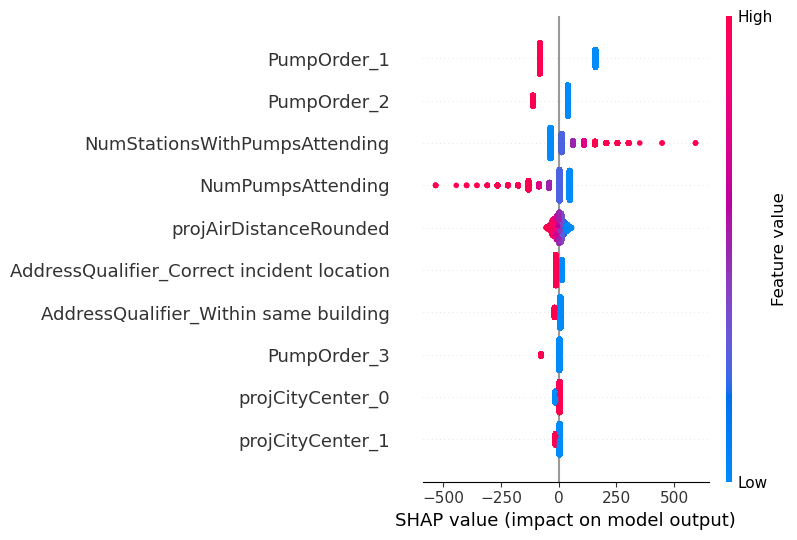

In [327]:
# check the average impact (absolute mean shap values) of features across target classes -- encoded features

shap_values = explainer.shap_values(X2_test_transformed_df)

shap.summary_plot(shap_values, X2_test_transformed_df, max_display=10, color_bar=True)

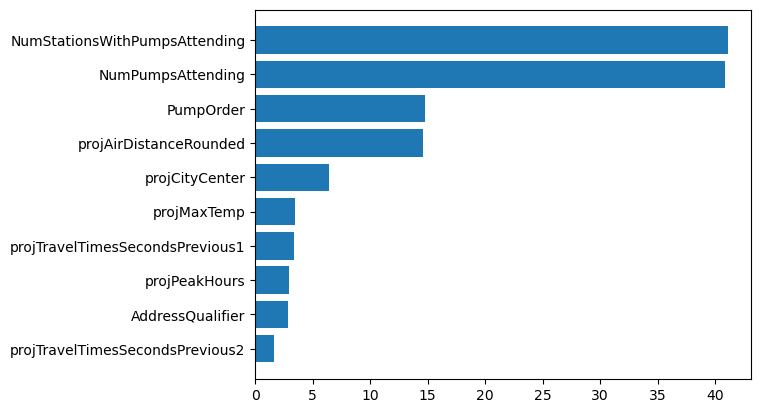

In [328]:
# check the average impact (absolute mean shap values) of features across target classes -- original features (before encoding)
# for original categorical features, we use the mean shap value of the underlying encoded features to avoid giving too much weights to categorical features which have a lot of categories


shap_values_df = pd.DataFrame(np.abs(shap_values), columns=all_feature_names)

feature_importance_shap = np.mean(shap_values_df, axis=0)

feature_importance_shap_df = pd.DataFrame({'feature': feature_importance_shap.index, 'importance': feature_importance_shap.values})


normalized_importance_shap = []

for cat_feature in cat_var:
    mask = feature_importance_shap_df['feature'].str.startswith(cat_feature + '_')
    mean_abs_importance = np.mean(feature_importance_shap_df.loc[mask, 'importance'])
    normalized_importance_shap.append({'feature': cat_feature, 'importance': mean_abs_importance})

for num_feature in numeric_feature_names:
    importance = feature_importance_shap_df[feature_importance_shap_df['feature'] == num_feature]['importance'].values[0]
    normalized_importance_shap.append({'feature': num_feature, 'importance': importance})

importance_df_shap = pd.DataFrame(normalized_importance_shap)
importance_df_shap = importance_df_shap.sort_values(by='importance', ascending=False)

importance_df_shap.head(10)

plt.barh(importance_df_shap.head(10)[::-1].feature, importance_df_shap.head(10)[::-1].importance)
plt.show()

# **5. Take 10 Year Data**

## **5.1. Take CalYaar 2014 to 2024**

In [329]:
# Take CalYear 2014 to 2024

df_10 = df[df.CalYear.isin([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])]
df_10 = pd.DataFrame(df_10)

In [330]:
# Check the CalYear in df_10
df_10.CalYear.unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014])

In [331]:
# Drop the column CalYear

df_10 = df_10.drop('CalYear', axis=1)

In [332]:
# Check duplicates

df_10.duplicated().sum()

0

## **5.2. Discrete Target Variable**

### **5.2.1. Data Pre-Processing**

In [333]:
# Create datasets for features and target

X = df_10.drop(['TravelTimeSeconds', 'TravelTimeClass'], axis=1)
y = df_10.TravelTimeClass

In [334]:
# Numeric variables that should be scaled using MinMaxScaler
num_var1 = ['NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount', 'NumCalls', 'projSnowfall', 'projWindForce', 'projPastIncidentsCount']

# Numeric variables that should be scaled using StandardScaler
num_var2 = ['projAirDistanceRounded', 'projMinTemp', 'projMaxTemp', 'projPrecipitation', 'projWindSpeed', 'projTravelTimesSecondsPrevious1',
       'projTravelTimesSecondsPrevious2', 'projTravelTimesSecondsPrevious3',
       'projTravelTimesSecondsPrevious4', 'projTravelTimesSecondsPrevious5']

# Categorical variables

cat_var = ['HourOfCall', 'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType', 'PropertyCategory', 'PropertyType', 'AddressQualifier', 
            'IncGeoBoroughCode', 'DeployedFromStationName', 'DeployedFromLocation', 'PumpOrder', 'PlusCodeDescription', 'projCalMonth', 
            'projCalWeekday', 'projCityCenter', 'projPeakHours', 'projWindDescription']

In [335]:
# Define the preprocessor pipeline

preprocessor = ColumnTransformer(transformers=[('num1', MinMaxScaler(), num_var1), ('num2', StandardScaler(), num_var2), ('cat', OneHotEncoder(handle_unknown='ignore'), cat_var)])

In [336]:
# Split the train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [337]:
# Transform the train and test datasets

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [338]:
# Transform the train and test datasets into DataFrames with feature labels

one_hot_encoder = preprocessor.named_transformers_['cat']
one_hot_feature_names_transformed = one_hot_encoder.get_feature_names_out(cat_var).tolist()
numeric_feature_names = num_var1 + num_var2

all_feature_names = numeric_feature_names + one_hot_feature_names_transformed

X_train_transformed_df = pd.DataFrame.sparse.from_spmatrix(X_train_transformed, columns=all_feature_names)
X_test_transformed_df = pd.DataFrame.sparse.from_spmatrix(X_test_transformed, columns=all_feature_names)

In [339]:
# Check shape

print(X_train_transformed_df.shape, X_test_transformed_df.shape)

(1250246, 570) (312562, 570)


### **5.2.2. RidgeClassifierCV**

#### **5.2.2.1. Train and Assess model performance**

In [340]:
# Train the model

rdc_cv = RidgeClassifierCV()

rdc_cv.fit(X_train_transformed_df, y_train)

RidgeClassifierCV()

In [341]:
# Get the best alpha

rdc_cv.alpha_

10.0

In [342]:
# Make predictions

y_pred_train_rdccv = rdc_cv.predict(X_train_transformed_df)
y_pred_test_rdccv = rdc_cv.predict(X_test_transformed_df)

In [343]:
class_report_train_rdccv = classification_report(y_train, y_pred_train_rdccv)
class_report_test_rdccv = classification_report(y_test, y_pred_test_rdccv)

print('Classification report on train data: \n', class_report_train_rdccv)
print()
print('Classification report on test data: \n', class_report_test_rdccv)

Classification report on train data: 
               precision    recall  f1-score   support

      Bin1.0       0.23      0.42      0.30    142574
      Bin2.0       0.21      0.19      0.20    145952
      Bin3.0       0.19      0.23      0.21    156687
      Bin4.0       0.18      0.03      0.05    153880
      Bin5.0       0.18      0.08      0.11    162959
      Bin6.0       0.19      0.10      0.13    165313
      Bin7.0       0.21      0.19      0.20    165041
      Bin8.0       0.28      0.60      0.38    157840

    accuracy                           0.23   1250246
   macro avg       0.21      0.23      0.20   1250246
weighted avg       0.21      0.23      0.20   1250246


Classification report on test data: 
               precision    recall  f1-score   support

      Bin1.0       0.23      0.42      0.30     35596
      Bin2.0       0.21      0.18      0.19     36529
      Bin3.0       0.18      0.22      0.20     39039
      Bin4.0       0.17      0.03      0.05     38430


#### **5.2.2.2. Feature Importance by SHAP Analysis**

In [345]:
# SHAP Analysis, instantiate the Explainer

explainer = shap.Explainer(rdc_cv, X_train_transformed_df)

Linear explainer: 312563it [00:15, 5099.76it/s]                             
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


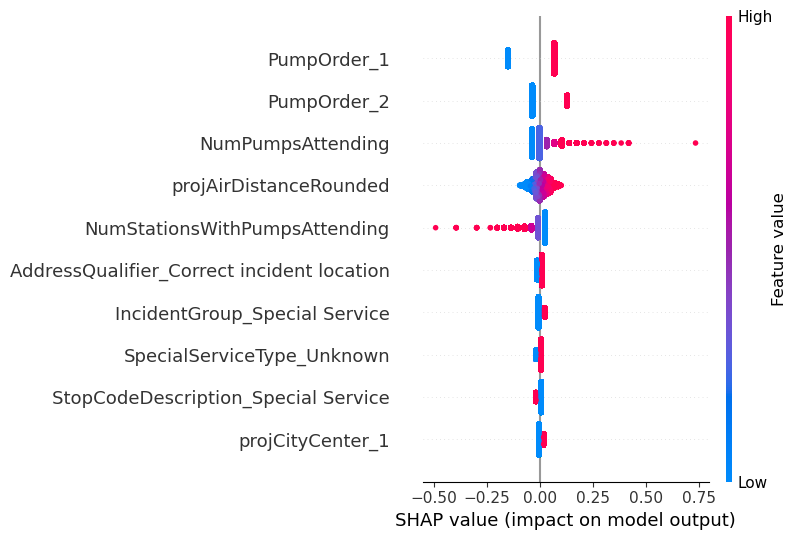

In [346]:
# Check the feature (encoded) importance for a certain target class, example for class 3

shap_values_class = explainer(X_test_transformed_df)

shap.summary_plot(shap_values_class[:,:,3], X_test_transformed_df, max_display=10)

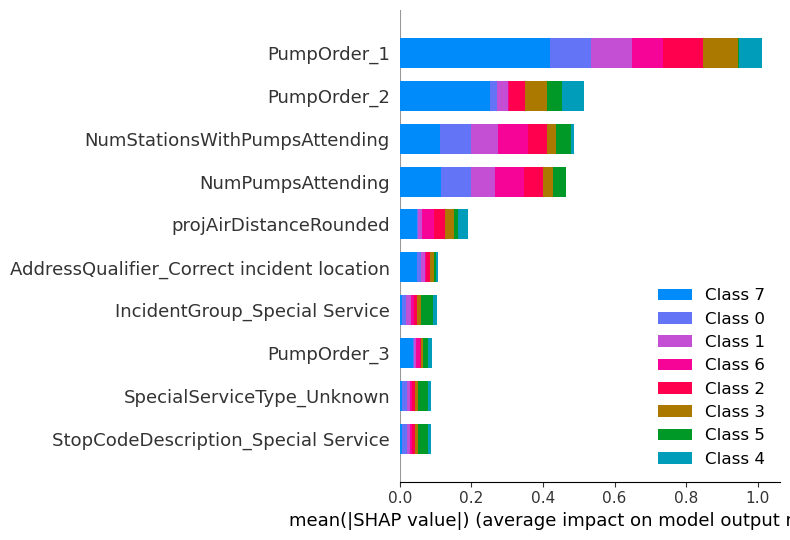

In [347]:
# check the average impact (absolute mean shap values) of features across target classes -- encoded features

shap_values = explainer.shap_values(X_test_transformed_df)

shap.summary_plot(shap_values, X_test_transformed_df, max_display=10, color_bar=True)

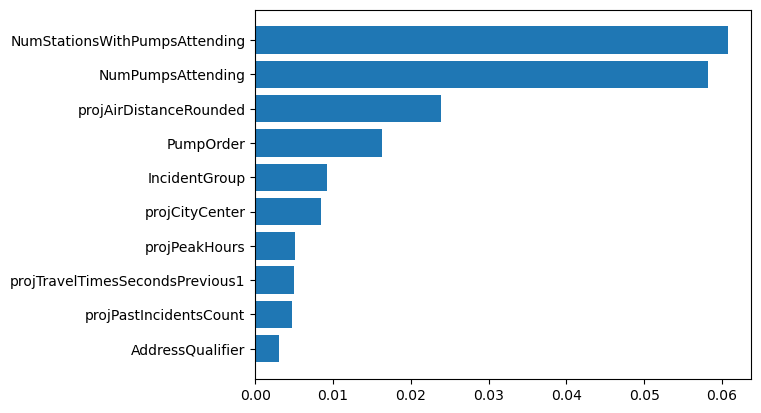

In [348]:
# check the average impact (absolute mean shap values) of features across target classes -- original features (before encoding)
# for original categorical features, we use the mean shap value of the underlying encoded features to avoid giving too much weights to categorical features which have a lot of categories


shap_values_df = pd.DataFrame(np.mean(np.abs(shap_values), axis=0), columns=all_feature_names)

feature_importance_shap = np.mean(shap_values_df, axis=0)

feature_importance_shap_df = pd.DataFrame({'feature': feature_importance_shap.index, 'importance': feature_importance_shap.values})


normalized_importance_shap = []

for cat_feature in cat_var:
    mask = feature_importance_shap_df['feature'].str.startswith(cat_feature + '_')
    mean_abs_importance = np.mean(feature_importance_shap_df.loc[mask, 'importance'])
    normalized_importance_shap.append({'feature': cat_feature, 'importance': mean_abs_importance})

for num_feature in numeric_feature_names:
    importance = feature_importance_shap_df[feature_importance_shap_df['feature'] == num_feature]['importance'].values[0]
    normalized_importance_shap.append({'feature': num_feature, 'importance': importance})

importance_df_shap = pd.DataFrame(normalized_importance_shap)
importance_df_shap = importance_df_shap.sort_values(by='importance', ascending=False)

importance_df_shap.head(10)

plt.barh(importance_df_shap.head(10)[::-1].feature, importance_df_shap.head(10)[::-1].importance)
plt.show()

## **5.3. Continuous Target Variable**

### **5.3.1. Data Pre-processing**

In [349]:
# Create datasets for feature and target

X2 = df_10.drop(['TravelTimeSeconds', 'TravelTimeClass'], axis=1)
y2 = df_10.TravelTimeSeconds

In [350]:
# Split the train and test datasets

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

In [351]:
# Fit and transform the train and test datasets

X2_train_transformed = preprocessor.fit_transform(X2_train)
X2_test_transformed = preprocessor.transform(X2_test)

In [352]:
# Transform the train and test datasets into DataFrames with feature labels

one_hot_encoder = preprocessor.named_transformers_['cat']
one_hot_feature_names_transformed = one_hot_encoder.get_feature_names_out(cat_var).tolist()
numeric_feature_names = num_var1 + num_var2

all_feature_names = numeric_feature_names + one_hot_feature_names_transformed

X2_train_transformed_df = pd.DataFrame.sparse.from_spmatrix(X2_train_transformed, columns=all_feature_names)
X2_test_transformed_df = pd.DataFrame.sparse.from_spmatrix(X2_test_transformed, columns=all_feature_names)

In [353]:
# Check shape

print(X2_train_transformed_df.shape, X2_test_transformed_df.shape)

(1250246, 570) (312562, 570)


### **5.3.2. RidgeCV**

#### **5.3.2.1. Train and Assess model performance**

In [354]:
# Train the model

rdg_cv = RidgeCV()

rdg_cv.fit(X2_train_transformed_df, y2_train)

RidgeCV()

In [355]:
# Get the best alpha

rdg_cv.alpha_

1.0

In [356]:
# Make predictions

y2_pred_train_rdgcv = rdg_cv.predict(X2_train_transformed_df)
y2_pred_test_rdgcv = rdg_cv.predict(X2_test_transformed_df)

In [357]:
# Assess the model performance

print('Score on train data: ', rdg_cv.score(X2_train_transformed_df, y2_train))
print('Score on test data: ', rdg_cv.score(X2_test_transformed_df, y2_test))
print()
print('mse on train data: ', mean_squared_error(y2_pred_train_rdgcv, y2_train))
print('mse on test data: ', mean_squared_error(y2_pred_test_rdgcv, y2_test))

Score on train data:  0.24537209866181986
Score on test data:  0.2420498733284402

mse on train data:  16633.02048010951
mse on test data:  16622.10704679572


#### **5.3.2.2. Feature Importance by SHAP Analysis**

In [359]:
# SHAP Analysis, instantiate the Explainer

explainer = shap.Explainer(rdg_cv, X2_train_transformed_df)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


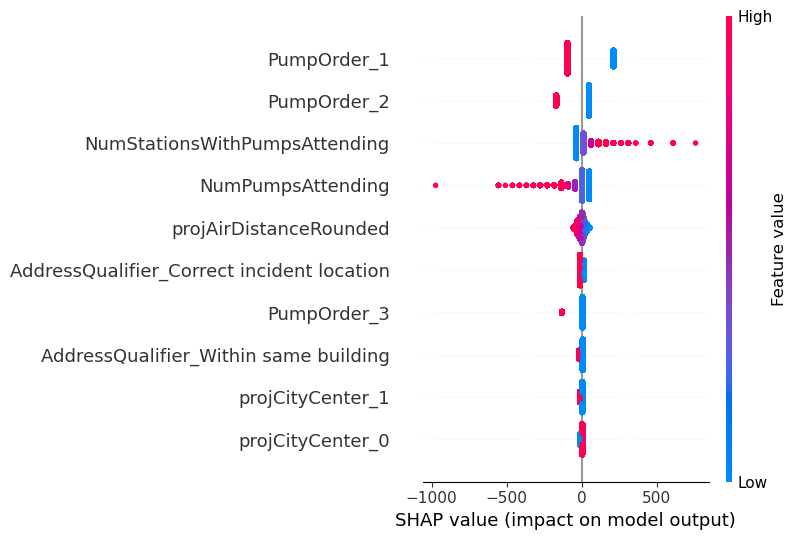

In [360]:
# check the average impact (absolute mean shap values) of features across target classes -- encoded features

shap_values = explainer.shap_values(X2_test_transformed_df)

shap.summary_plot(shap_values, X2_test_transformed_df, max_display=10, color_bar=True)

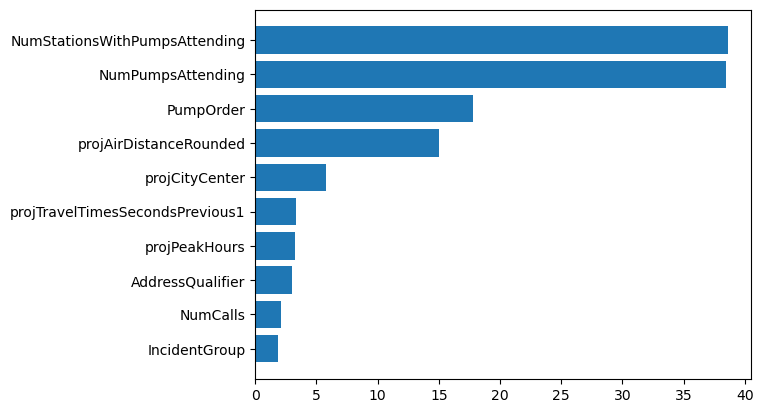

In [361]:
# check the average impact (absolute mean shap values) of features across target classes -- original features (before encoding)
# for original categorical features, we use the mean shap value of the underlying encoded features to avoid giving too much weights to categorical features which have a lot of categories


shap_values_df = pd.DataFrame(np.abs(shap_values), columns=all_feature_names)

feature_importance_shap = np.mean(shap_values_df, axis=0)

feature_importance_shap_df = pd.DataFrame({'feature': feature_importance_shap.index, 'importance': feature_importance_shap.values})


normalized_importance_shap = []

for cat_feature in cat_var:
    mask = feature_importance_shap_df['feature'].str.startswith(cat_feature + '_')
    mean_abs_importance = np.mean(feature_importance_shap_df.loc[mask, 'importance'])
    normalized_importance_shap.append({'feature': cat_feature, 'importance': mean_abs_importance})

for num_feature in numeric_feature_names:
    importance = feature_importance_shap_df[feature_importance_shap_df['feature'] == num_feature]['importance'].values[0]
    normalized_importance_shap.append({'feature': num_feature, 'importance': importance})

importance_df_shap = pd.DataFrame(normalized_importance_shap)
importance_df_shap = importance_df_shap.sort_values(by='importance', ascending=False)

importance_df_shap.head(10)

plt.barh(importance_df_shap.head(10)[::-1].feature, importance_df_shap.head(10)[::-1].importance)
plt.show()